Assignment 2:
    - Chapter 3 - Problem 20, 21, 24, 25, 26, 29 
    - Chapter 4 - Problems 19, 21, 22, 26, 28

In [1]:
import math
import pandas as pd
import numpy as np
from scipy.stats import t, ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

### Chapter 3 Ex 20

In [2]:
df = pd.DataFrame({'College': ['A', 'B', 'C', 'D', 'E'], 'In-State': [1000,4000,5000,8000,40000], 'Out-of-State':[3000,8000,30000,32000,40000], 'Out/In Ratio': [3,2,6,4,1], 'Log(In-State)': [6.9078,8.2941,8.5172,8.9872,10.5966], 'Log(Out-of-State)': [8.0064,8.9872,10.3090,10.3735,10.5966] })

In [3]:
df.head()

,College,In-State,Out-of-State,Out/In Ratio,Log(In-State),Log(Out-of-State)
0,A,1000,3000,3,6.9078,8.0064
1,B,4000,8000,2,8.2941,8.9872
2,C,5000,30000,6,8.5172,10.3090
3,D,8000,32000,4,8.9872,10.3735
4,E,40000,40000,1,10.5966,10.5966


#### (a)

In [4]:
df.describe()

,In-State,Out-of-State,Out/In Ratio,Log(In-State),Log(Out-of-State)
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,11600.000000,22600.000000,3.200000,8.660580,9.654540
std,16071.714283,16149.303391,1.923538,1.330597,1.117408
min,1000.000000,3000.000000,1.000000,6.907800,8.006400
25%,4000.000000,8000.000000,2.000000,8.294100,8.987200
50%,5000.000000,30000.000000,3.000000,8.517200,10.309000
75%,8000.000000,32000.000000,4.000000,8.987200,10.373500
max,40000.000000,40000.000000,6.000000,10.596600,10.596600


In [5]:
math.log(df.describe()["In-State"][1])

9.358760377094455

Log(In-State) and log of mean("In-State") are different. 

#### (b)

In [6]:
math.log(df["In-State"].median())

8.517193191416238

In [7]:
df["Log(In-State)"].median()

8.5172

As we can see from above calculations both log of median of "In-State" and median of "Log(In-State)" are same.

#### (c)

In [8]:
median = df["Out/In Ratio"].median()

In [9]:
print(f"Median of Out/In Ratio = {median}")
print(f"Log of median of Out/In Ratio = {math.log(median)}")

Median of Out/In Ratio = 3.0
Log of median of Out/In Ratio = 1.0986122886681098


In [10]:
(df["Log(Out-of-State)"] - df["Log(In-State)"]).median()

1.0985999999999994

Both are same.

### Chapter 4 Ex 19

In [11]:
df_ex0419 = pd.read_csv('./Datasets/ex0221.csv')

In [12]:
df_ex0419.head()

,Unnamed: 0,Humerus,Status
0,1,0.687,Survived
1,2,0.703,Survived
2,3,0.709,Survived
3,4,0.715,Survived
4,5,0.728,Survived


#### (a)

In [27]:
# Calculate pvalue with rank sum test
statistics = mannwhitneyu(df_ex0419[df_ex0419['Status']=='Survived']['Humerus'],
                         df_ex0419[df_ex0419['Status']=='Perished']['Humerus'])

print(f"P-Value: {statistics.pvalue}")

P-Value: 0.17182490521955962


#### (b)

### Chapter 3 Ex 21

In [28]:
df_ex0321 = pd.read_csv('./Datasets/ex0321.csv')

In [29]:
df_ex0321.head()

,Unnamed: 0,Lifelength,Censored,Expected
0,1,63,0,70
1,2,69,0,71
2,3,58,0,71
3,4,61,1,70
4,5,70,0,70


In [33]:
ttest_res = ttest_ind(df_ex0321[df_ex0321["Censored"] == 0]["Lifelength"], df_ex0321[df_ex0321["Censored"] == 0]["Expected"])
one_sided = ttest_res.pvalue/2
print(f"Not significant since pvalue = {one_sided} which is greater than 0.05")

Not significant since pvalue = 0.16191729240170333 which is greater than 0.05


### Chapter 3 Ex 24

In [35]:
df_ex0324 = pd.read_csv('./Datasets/case0102.csv')

In [36]:
df_ex0324.head()

,Unnamed: 0,Salary,Sex
0,1,3900,Female
1,2,4020,Female
2,3,4290,Female
3,4,4380,Female
4,5,4380,Female


In [37]:
df_ex0324["salary_log"] = np.log(df_ex0324["Salary"])

In [38]:
df_ex0324.head()

,Unnamed: 0,Salary,Sex,salary_log
0,1,3900,Female,8.268732
1,2,4020,Female,8.299037
2,3,4290,Female,8.364042
3,4,4380,Female,8.384804
4,5,4380,Female,8.384804


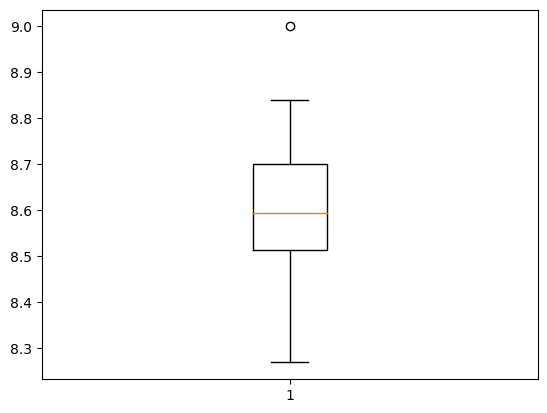

In [40]:
plt.boxplot(df_ex0324["salary_log"])
plt.show()

###### (b)

In [44]:
pval = ttest_ind(df_ex0324[df_ex0324["Sex"] == "Male"]["salary_log"], df_ex0324[df_ex0324["Sex"] == "Female"]["salary_log"])
print(f"One Sided pvalue= {pval.pvalue/2}")

One Sided pvalue= 9.245317456737838e-09


In [47]:
len(df_ex0324[df_ex0324["Sex"] == "Male"])

32

###### (c)

In [51]:
np.median(df_ex0324[df_ex0324["Sex"] == "Male"]["salary_log"])

8.699514748210191

In [54]:
dof_male = len(df_ex0324[df_ex0324["Sex"] == "Male"]) - 1
dof_female = len(df_ex0324[df_ex0324["Sex"] == "Female"]) - 1
ci_male = t.interval(0.95, df=dof_male, loc=np.median(df_ex0324[df_ex0324["Sex"] == "Male"]["salary_log"]))
ci_female = t.interval(0.95, df=dof_female, loc=np.median(df_ex0324[df_ex0324["Sex"] == "Female"]["salary_log"]))
print("Confidence Interval for Male:", ci_male)
print("Confidence Interval for Female:", ci_female)

Confidence Interval for Male: (6.660001301813784, 10.739028194606599)
Confidence Interval for Female: (6.559954859818422, 10.560550501934944)


### Chapter 3 Ex 25

In [55]:
df_ex0325 = pd.read_csv('./Datasets/case0302.csv')

In [56]:
df_ex0325.head()

,Unnamed: 0,Dioxin,Veteran
0,1,0,Vietnam
1,2,0,Vietnam
2,3,0,Vietnam
3,4,0,Vietnam
4,5,0,Vietnam


In [61]:
ttest_res = ttest_ind(df_ex0325[df_ex0325["Veteran"] == "Vietnam"]["Dioxin"], df_ex0325[df_ex0325["Veteran"] == "Other"]["Dioxin"])
print(f"One sided pvalue= {ttest_res.pvalue/2}")

One sided pvalue= 0.39630247826778225


In [73]:
df_ex0325[df_ex0325["Veteran"] == "Vietnam"].sort_values('Dioxin', ascending=False).head(n=2)

,Unnamed: 0,Dioxin,Veteran
645,646,45,Vietnam
644,645,25,Vietnam


###### Largest 2 values are 45 and 25, so without 25 ttest would be as below:

In [77]:
viet_df = df_ex0325[(df_ex0325["Veteran"] == "Vietnam")]
viet_df = viet_df[viet_df["Dioxin"] < 25]

other_df = df_ex0325[(df_ex0325["Veteran"] == "Other")]
other_df = other_df[(other_df["Dioxin"] < 25)]

In [78]:
ttest_res_wo = ttest_ind(viet_df["Dioxin"], other_df["Dioxin"])
print(f"One sided pvalue= {ttest_res_wo.pvalue/2}")

One sided pvalue= 0.46141180772176227


### Chapter 3 Ex 26

In [79]:
df_ex0326 = df_ex0325.copy()

In [81]:
df_ex0326["Dioxin_Log"] = np.log(df_ex0326["Dioxin"] + 0.5)

In [82]:
df_ex0326.head()

,Unnamed: 0,Dioxin,Veteran,Dioxin_Log
0,1,0,Vietnam,-0.693147
1,2,0,Vietnam,-0.693147
2,3,0,Vietnam,-0.693147
3,4,0,Vietnam,-0.693147
4,5,0,Vietnam,-0.693147


###### (a)

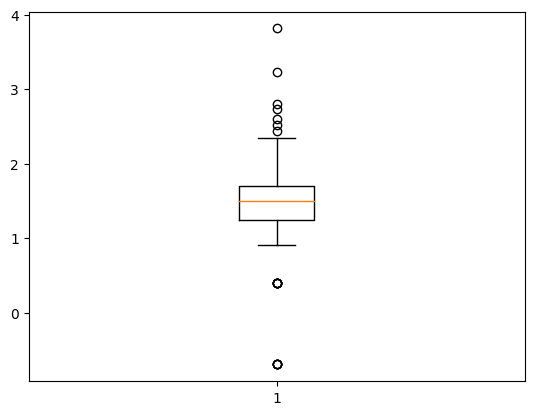

In [85]:
plt.boxplot(df_ex0326[df_ex0326["Veteran"] == "Vietnam"]["Dioxin_Log"])
plt.show()

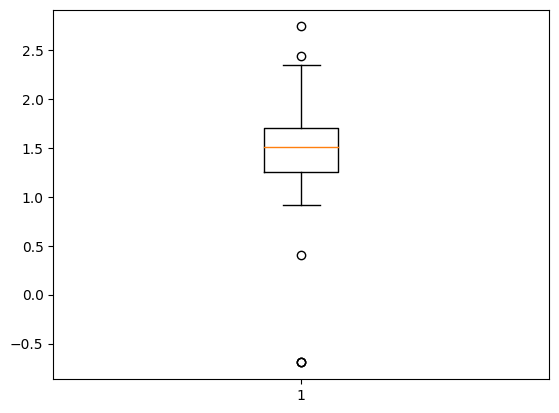

In [84]:
plt.boxplot(df_ex0326[df_ex0326["Veteran"] == "Other"]["Dioxin_Log"])
plt.show()

###### (b)

In [87]:
ttest_res = ttest_ind(df_ex0326[df_ex0326["Veteran"] == "Vietnam"]["Dioxin_Log"], df_ex0326[df_ex0326["Veteran"] == "Other"]["Dioxin_Log"])
ttest_res
print(f"one sided pvalue = {ttest_res.pvalue/2}")

one sided pvalue = 0.19078673692068265


###### (c)

In [92]:
viet_df = df_ex0326[df_ex0326["Veteran"] == "Vietnam"]
other_df = df_ex0326[df_ex0326["Veteran"] == "Other"]

ci_viet = t.interval(0.95, df = len(viet_df) - 1, loc=np.mean(viet_df["Dioxin_Log"]))
ci_other = t.interval(0.95, df = len(other_df) - 1, loc=np.mean(other_df["Dioxin_Log"]))
orig_ci_viet = (np.exp(ci_viet[0]), np.exp(ci_viet[1]))
orig_ci_other = (np.exp(ci_other[0]), np.exp(ci_other[1]))
print(ci_viet, ci_other)
print(orig_ci_viet, orig_ci_other)

(-0.5011006425380249, 3.4261967942833804) (-0.565970917958976, 3.4039977049045618)
(0.605863453513055, 30.75943554828799) (0.5678085834885581, 30.08412743430105)


### Chapter 3 Ex 29

In [93]:
df_ex0329 = pd.read_csv('./Datasets/case0301.csv')

In [94]:
df_ex0329.head()

,Unnamed: 0,Rainfall,Treatment
0,1,1202.6,Unseeded
1,2,830.1,Unseeded
2,3,372.4,Unseeded
3,4,345.5,Unseeded
4,5,321.2,Unseeded


###### (a)

In [98]:
unseeded_df = df_ex0329[df_ex0329["Treatment"] == "Unseeded"].copy()
unseeded_df["Rainfall_100"] = unseeded_df["Rainfall"] + 100
unseeded_df["Rainfall_200"] = unseeded_df["Rainfall"] + 200
unseeded_df["Rainfall_300"] = unseeded_df["Rainfall"] + 300
unseeded_df["Rainfall_400"] = unseeded_df["Rainfall"] + 400
unseeded_df.head()

,Unnamed: 0,Rainfall,Treatment,Rainfall_100,Rainfall_200,Rainfall_300,Rainfall_400
0,1,1202.6,Unseeded,1302.6,1402.6,1502.6,1602.6
1,2,830.1,Unseeded,930.1,1030.1,1130.1,1230.1
2,3,372.4,Unseeded,472.4,572.4,672.4,772.4
3,4,345.5,Unseeded,445.5,545.5,645.5,745.5
4,5,321.2,Unseeded,421.2,521.2,621.2,721.2


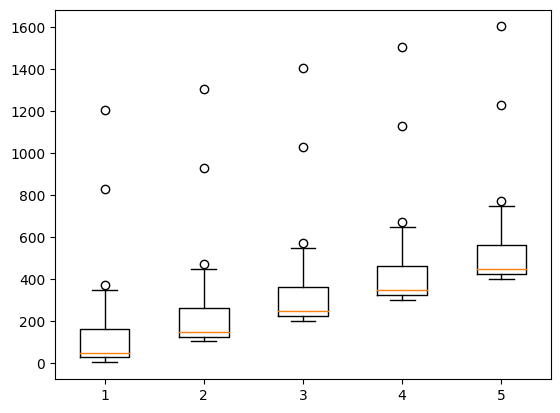

In [101]:
plt.boxplot([unseeded_df["Rainfall"], 
            unseeded_df["Rainfall_100"], 
            unseeded_df["Rainfall_200"], 
            unseeded_df["Rainfall_300"], 
            unseeded_df["Rainfall_400"]])
plt.show()

###### (b)

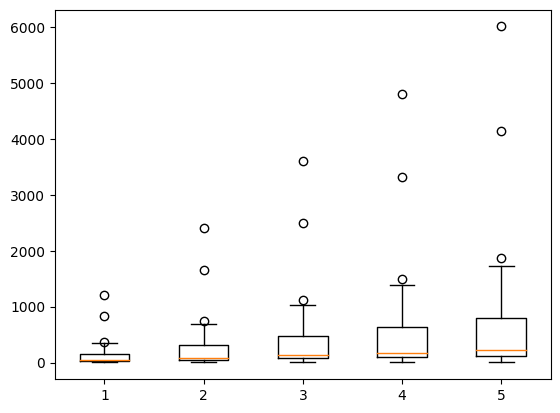

In [102]:
unseeded_df['Rainfall_2'] = unseeded_df['Rainfall']*2
unseeded_df['Rainfall_3'] = unseeded_df['Rainfall']*3
unseeded_df['Rainfall_4'] = unseeded_df['Rainfall']*4
unseeded_df['Rainfall_5'] = unseeded_df['Rainfall']*5
plt.boxplot([unseeded_df["Rainfall"], 
            unseeded_df["Rainfall_2"], 
            unseeded_df["Rainfall_3"], 
            unseeded_df["Rainfall_4"], 
            unseeded_df["Rainfall_5"]])
plt.show()

Spread of the data is greater for multiplicative than additive.

### TODO Chapter 4 Ex 20, 21, 22, 26, 28